11) Program on regression using a Decision Tree Regressor to predict height based on gender


In [21]:
import numpy as np 
#intializing number of  samples  for each population.
n=200


generate random heights for a female/male population (height_pop1_f/m) using a normal distribution.
loc : the mean of the distribution.
scale :the standard deviation of the distribution.
size :specifies the number of samples to generate (n)

In [22]:
height_pop1_f=np.random.normal(loc=155,scale=10,size=n)
height_pop1_m=np.random.normal(loc=175,scale=5,size=n)
height_pop2_f=np.random.normal(loc=165,scale=10,size=n)
height_pop2_m=np.random.normal(loc=185,scale=5,size=n)
#concatenate the heights from all four populations into two arrays: 
# height_f for female heights and height_m for male heights.
height_f=np.concatenate([height_pop1_f,height_pop2_f])
height_m=np.concatenate([height_pop1_m,height_pop2_m])

In [23]:
#importing libraries and modules for data analysis, visualization, and regression using scikit-learn's DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

create a pandas DataFrame df_height with two columns: 'Gender' and 'Height'.
'Gender' is a column containing values 1 (representing female) and 2 (representing male).
'Height' is a column containing the concatenated height data for both genders.

In [24]:
df_height=pd.DataFrame(
    {
        'Gender':[1 for i in range(height_f.size)]+[2 for i in range(height_m.size)],
        'Height':np.concatenate((height_f,height_m))
    }
)


In [25]:
df_height

,Gender,Height
0,1,162.838735
1,1,145.658310
2,1,168.939612
3,1,161.110362
4,1,143.211272
...,...,...
795,2,186.209148
796,2,185.501658
797,2,185.012972
798,2,185.187546


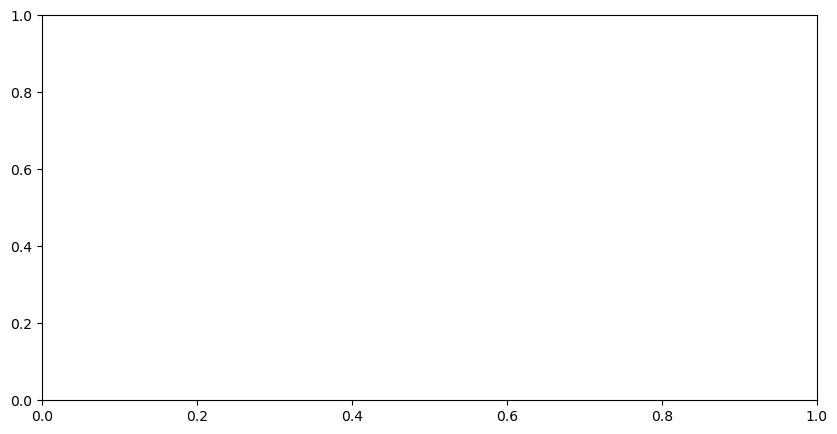

In [26]:
#This line sets up a Matplotlib figure and axis for plotting.
fig, ax=plt.subplots(1,1,figsize=(10,5))

create a histogram plot for female and male heights from the DataFrame and adds it to the axis.
label: provides a label for the plot.
kind: specifies the plot type (histogram).
bins :determines the number of bins in the histogram.
alpha :controls the transparency of the plot.
ax :specifies the axis to which the plot is added.

In [27]:
# this creates histogram plot for female heights
df_height[df_height['Gender']==1]['Height'].plot(
    label='Female',kind='hist',bins=10,alpha=0.7,ax=ax
)

<Axes: ylabel='Frequency'>

In [36]:
# this creates a histogram plot for male heights
df_height[df_height['Gender']==2]['Height'].plot(
    label='Male',kind='hist',bins=10,ax=ax,alpha=0.7
)

<Axes: ylabel='Frequency'>

In [29]:
#adds a legend to both the histogram plots
ax.legend()


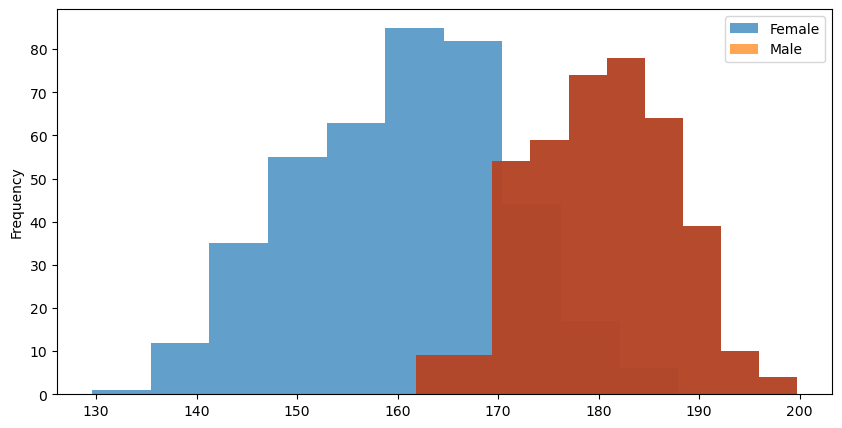

In [37]:
fig

calculate mean and median of height

In [38]:
df_height.groupby('Gender')[['Height']].agg([np.mean,np.median]).round(1)

Height       
         mean median
Gender              
1       160.6  160.9
2       180.2  180.3

In [39]:
#splitting training and test data
df_train,df_test=train_test_split(df_height,test_size=0.3)
x_train,x_test=df_train[['Gender']],df_test[['Gender']]
y_train,y_test=df_train['Height'],df_test['Height']